<a href="https://colab.research.google.com/github/sera0911/asia_ai_study/blob/main/MachinLearning/MachinLearning_day1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 머신러닝 단계

1. Business Understanding
2. Data Understanding - 데이터 수집(웹 스크레핑, 외부API, 공공데이터, 탐색(기술통계, 차트))
3. Data Preparation - 머신 학습을 위해서 벡터 변환
4. Modeling - 학습, 테스터, 검증 데이터 분할   
   적용 알고리즘과 하이퍼파라미터 설정  
   fit() 학습 => 모델 생성 
5. 예측
6. 평가
7. 배포(실무에 적용)




사이킷런 (scikit-learn) 개발 패턴   
1. 데이터 분할 – 모델을 학습시키기 위한 데이터셋과 모델의 성능을 테스트하기 위한 데이터셋으로 분리한
다
2. 모델 생성 – 예측 목적에 맞는 모델 생성, 하이퍼파라미터 설정   
하이퍼파라미터 – 학습에 의해 찾는 값이 아닌 개발자가 직접 설정해야 하는 파라미터
3. 모델 학습 - fit, 훈련 데이터로 모델 학습 또는 특징 추출
4. 예측 – predict / predict_prob(예측), transform(변환)
테스트 데이터셋 예측 또는 변환
5. 평가 – 모델 성능 평가
정확도, AUC, R2, MSE 등 목적에 맞는 적절한 평가 함수를 이용해 결과 확인

샘플 데이터 셋 로드  
• data는 피처의 데이터 세트  

• taget은 분류시 레이블 값, 회귀일 때는 숫자 결과값 데이터 세트  

• target_name : roquf 에이블의 이름  

• feature_names : 피처의 이름  

• DESCR : 데이터 세트에 대한 설명과 각 피처의 설명  

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib as mpl
import matplotlib.font_manager as fm

%config InlineBackend.figure_format = 'retina'
 
!apt -qq -y install fonts-nanum
 
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()

fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.


In [2]:
#iris 샘플 코드
from sklearn.datasets import load_iris
dataset = load_iris()

In [3]:
type(dataset)

sklearn.utils.Bunch

In [4]:
dataset.keys()   #key 값을 확인

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [5]:
dataset['data']   #data 는 학습해야 할 feed용 데이터를 의미

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [6]:
dataset['target']   #target은 label 데이터 이며, 예측해야 할 (class) 데이터

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [7]:
dataset['target_names']   #target_names 는 0, 1, 2와 같이 숫자로 된 데이터들의 원 이름

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [8]:
dataset['DESCR']   #DESCR은 description입니다. 데이터 셋에 대한 설명을 제공

'.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ============== ==== =

In [9]:
dataset['feature_names']   #feature_names는 제공되는 (feed되는) 데이터 셋의 column 명

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [10]:
dataset['filename']   #filename은 datasets을 다운로드 받은 경로를 return

'/usr/local/lib/python3.7/dist-packages/sklearn/datasets/data/iris.csv'

• dataset 자체가 order가 깔끔히 정렬된 상태이기 때문에 반드시 dataset을 shuffle 해주어야 합니다   

• sklearn.model_selection.train_test_split( test_size, train_size, shuffle, random_state) - 학습과 검증 (혹은 테스트) 셋을 나누어 주는 역할을 수행 (shuffle과 split을 수행)   
test_size : 전체 데이터에서 테스트 데이터 세트 크기를 얼마로 샘플링할 것인가를 결정   
train_size : 전체 데이터에서 학습용 데이터 세트 크기를 얼마로 샘플링할 것인가를 결정  
shuffle : 데이터를 분리하기 전에 데이터를 미리 섞을지를 결정   
random_state : 호출할때마다 동일한 학습 / 테스트용 데이터 세트를 생성하기 위해 주어지는 난수 값

In [11]:
from sklearn.model_selection import train_test_split

#train, test사이즈를 따로 지정하지 않았을 때 기본값 출력 
x_train, x_test, y_train, y_test = train_test_split(dataset['data'], dataset['target'])
print( x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(112, 4) (38, 4) (112,) (38,)


• 검증 세트로 과대 적합여부를 모니터링 할 수 있다.

• 검증 세트를 활용하여 모델의 성능 평가를 진행할 수 있다.

• 주요 hyperparameter :   
test_size : validation set에 할당할 비율 (20% -> 0.2), 기본값 0.25  
stratify : 분할된 샘플의 class 갯수가 동일한 비율로 유지  
random_state : 랜덤 시드값  
shuffle : 셔플 옵션, 기본값 True  

In [12]:
x = dataset['data']
y = dataset['target']

#사이즈를 지정해줌
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=0.2, random_state=30)
x.shape
x_train.shape, x_test.shape
y.shape
y_train.shape, y_test.shape

((120,), (30,))

• make_regression() - 선형 회귀에 사용할 데이터 셋 생성 (선형으로 분산된 데이터를 생성, 가우스 노이즈의 표준  
편차, 원하는 피쳐의 수 지정 가능  
실수 특성 행렬과 실수 타깃 벡터를 반환  
n_informative 는 타깃 벡터를 생성하는 데 사용할 특성 수를 결정, n_features 는 전체 특성 수  

• make_classification() - 분류에 필요한 모의 데이터 셋 생성 ,  
실수 특성 행렬과 클래스의 소속을 나타내는 정수 타깃 벡터를 반환  
weights 매개변수를 사용해 불균형한 클래스를 가진 모의 데이터셋 생성

n_sample : 표본 데이터 수 (default=100)  
n_features : 독립변수의 수 (default=20)  
n_informative : 독립변수 중 종속변수와 상관관계가 있는 성분의 수 (default=2)  
n_redundant : 독립변수 중 다른 독립 변수의 선형 조합으로 나타나는 성분의 수 (default=2), 불필요한 수   
n_classes : 종속변수의 클래스 수 (default=2)   
weights : 각 클래스에 할당된 표본 수 (비율)

In [13]:
from sklearn.datasets import make_regression, make_classification,make_blobs

#특성 행렬, 타깃 벡터, 정답계수를 생성
features, target, coefficients = make_regression(n_samples = 100,
n_features = 3, n_informative = 3, n_targets = 1, noise=0.0, coef=True, random_state = 1)

#난수값 데이터는 100개인데 3개만 출력함
print('특성 행렬\n', features[:3])
print('타깃 벡터\n', target[:3])

특성 행렬
 [[ 1.29322588 -0.61736206 -0.11044703]
 [-2.793085    0.36633201  1.93752881]
 [ 0.80186103 -0.18656977  0.0465673 ]]
타깃 벡터
 [-10.37865986  25.5124503   19.67705609]


In [14]:
#n이 총 독립변수의 수 >= informative + redundant로 이루어져야함
features, target = make_classification(n_samples = 100,
n_features = 5, n_informative = 3, n_redundant = 1, n_classes = 2, weights=[.25, .75], random_state = 1)
print('특성 행렬\n', features[:3])
print('타깃 벡터\n', target[:3])

특성 행렬
 [[ 0.80883345 -0.01292975  0.56176937  1.30254895 -0.36397371]
 [-0.22457245 -1.36055919  1.18167125  1.42343127 -1.23621312]
 [ 0.89774046 -0.08679062  0.4559873   1.41088304 -0.71636275]]
타깃 벡터
 [1 1 1]


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


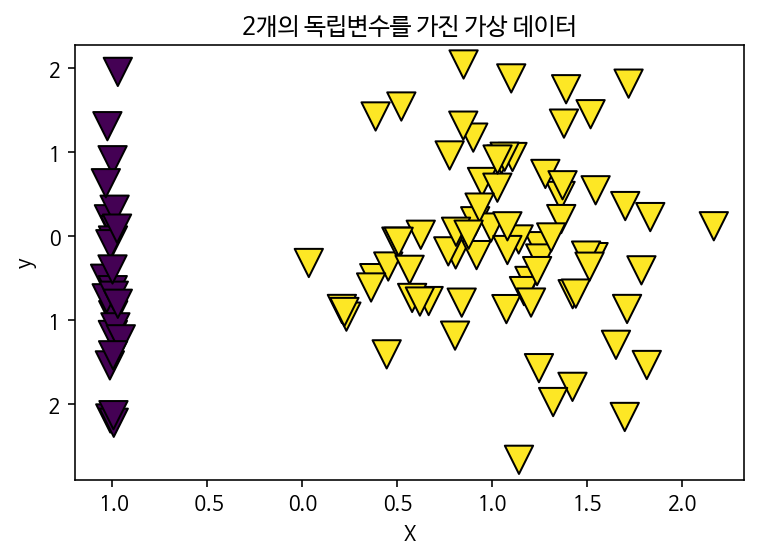

X형태: (100, 2)
y형태: (100,)


In [16]:
import matplotlib.pyplot as plt

X, y = make_classification(n_features = 2, n_informative = 1, n_redundant = 0, 
                           n_clusters_per_class=1, weights=[.25, .75], random_state = 57)

plt.title("2개의 독립변수를 가진 가상 데이터") 
plt.scatter(X[:, 0], X[:, 1], marker='v', c=y, s=200, edgecolors='k')
plt.xlabel('X')
plt.ylabel('y')
plt.show()
print('X형태:', X.shape)
print('y형태:', y.shape)

• make_blobs() - 가우시안 정규분포를 이용하여 모든 방향으로 같은 성질을 가지는 가상 데이터 생성    
centers 파라미터 : 생성할 클러스터의 수  
cluster_std 파라미터 : 클러스터의 표준 편차 (default=1.0)  


• make_circles() - 두개의 차원에 작은 원을 포함하는 큰 원이 포함된 임의의 데이터셋을 생성,  
SVM(Support Vector Machines)과 같은 알고리즘을 사용하여 분류를 수행할 때 유용

특성 행렬
 [[ -1.22685609   3.25572052]
 [ -9.57463218  -4.38310652]
 [-10.71976941  -4.20558148]]
타깃 벡터
 [0 1 1]


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


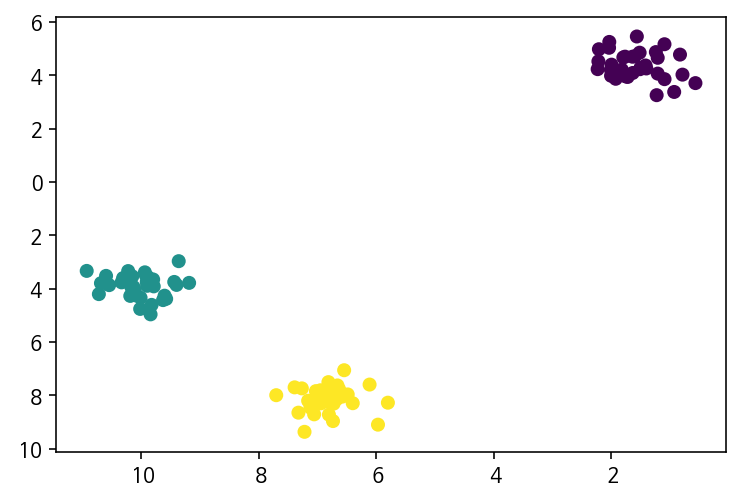

In [19]:
features, target = make_blobs(n_samples = 100,
n_features = 2, centers =3, cluster_std = 0.5, shuffle=True, random_state = 1)
print('특성 행렬\n', features[:3])
print('타깃 벡터\n', target[:3])

import matplotlib.pyplot as plt
plt.scatter(features[:, 0], features[:, 1], c=target)
plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


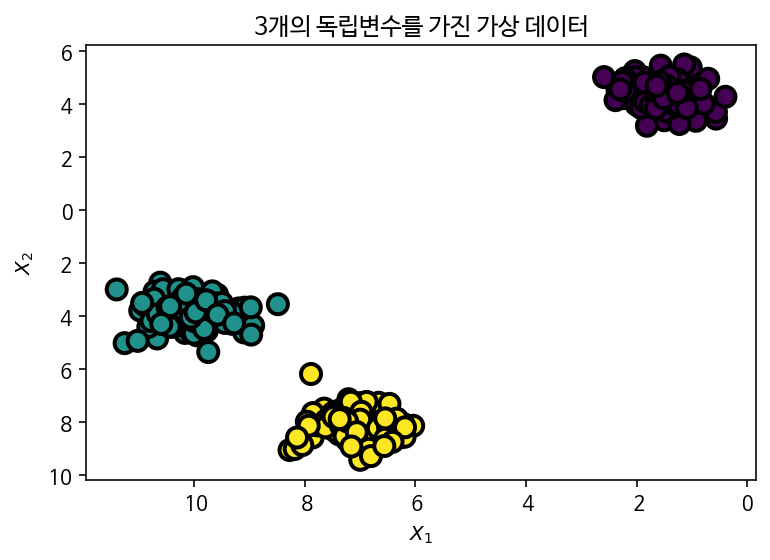

In [23]:
plt.title("3개의 독립변수를 가진 가상 데이터") 

X, y = make_blobs(n_samples = 300,
n_features = 2, centers =3, cluster_std = 0.5,random_state = 1)
plt.scatter(X[:,0],X[:,1],marker='o', c=y, s=100, edgecolor="k", linewidth=2)
plt.xlabel("$X_1$")
plt.ylabel("$X_2$")
plt.show()

make_moons() - 초승달 모양 클러스터 가상 데이터 생성    
make_gaussian_quantiles() - 가우시안 분포의 표본을 다차원으로 가상 데이터 생성

데이터 랭글링(data wrangling)  
• 광범위한 의미의 원본 데이터를 정제하고 사용 가능한 형태로 구성하기 위한 변환 과정  
• 데이터 랭글링에 사용되는 가장 일반적인 데이터 구조 - 데이터프레임

#### 실습

데이터 종류  
customer_master.csv 쇼핑몰 사이트의 고객 정보(회원 등록시 입력하는 성별, 연령 정보 포함)  
item_master.csv 취급하는 상품 데이터 (상품명과 가격 포함)  
transaction_1.csv, transaction_2.csv 구매내역 데이터 (고객별 구매 정보)  
transaction_detail_1.csv, transaction_detial_2.csv 구매 상세 데이터 (구입한 상품과 수량정보 포함)

1. 데이터 로드 (데이터 이해 단계)  
2. 데이터 결합
- transaction_1.csv, transaction_2.csv 세로로 결합 (transaction 통합)
- transaction_detail_1.csv, transaction_detail_2.csv 세로로 결합 (transaction_detail 통합) 
3. 매출 데이터끼리 조인  
transaction_detail을 기준으로 transaction(payment_date, customer_id)를 가로로 결합
4. 마스터 데이터 조인  
transaction_detail을 기준으로 customer_master(customer_id), item_master(item_id)를 가로로 결합
5. 데이터 컬럼 추가(파생 컬럼생성)
매출은 quantity와 item_price의 곱을 계산해서 추가  
6. 데이터 검산  
데이터 가공 전 transaction의 price 총합과 데이터 가공 후에 계산한 price의 총합이 동일한지 확인
7. 통계량 확인  
결손치, 데이터 개수, 평균, 표준편차, 최소값, 사분위수, 중앙값, 최대값
8. 월별 데이터 집계  
전체적으로 매출이 늘어나고 있는지 줄어들고 있는지 파악  
구입일인 payment_date에서 연월을 추출해서 새롭게 컬럼을 작성한 후 연월 단위로 price를 합계
9. 월별, 상품별 데이터 집계
10. 상품별 매출 추이 시각화


In [35]:
#1. 데이터 로드 & 결합
#transaction_1.csv, transaction_2.csv 세로로 결합 (transaction 통합)

import pandas as pd
import numpy as np

transaction_1 = pd.read_csv('transaction_1.csv')
transaction_2 = pd.read_csv('transaction_2.csv')
transaction_detail_1 = pd.read_csv('transaction_detail_1.csv')
transaction_detail_2 = pd.read_csv('transaction_detail_2.csv')
customer_master = pd.read_csv('customer_master.csv')
item_master = pd.read_csv('item_master.csv')

transaction = pd.concat([transaction_1, transaction_2])

print(transaction)

     transaction_id   price         payment_date customer_id
0       T0000000113  210000  2019-02-01 01:36:57    PL563502
1       T0000000114   50000  2019-02-01 01:37:23    HD678019
2       T0000000115  120000  2019-02-01 02:34:19    HD298120
3       T0000000116  210000  2019-02-01 02:47:23    IK452215
4       T0000000117  170000  2019-02-01 04:33:46    PL542865
...             ...     ...                  ...         ...
1781    T0000006894  180000  2019-07-31 21:20:44    HI400734
1782    T0000006895   85000  2019-07-31 21:52:48    AS339451
1783    T0000006896  100000  2019-07-31 23:35:25    OA027325
1784    T0000006897   85000  2019-07-31 23:39:35    TS624738
1785    T0000006898   85000  2019-07-31 23:41:38    AS834214

[6786 rows x 4 columns]


In [31]:
#2. 데이터 결합
#transaction_detail_1.csv, transaction_detail_2.csv 세로로 결합 (transaction_detail 통합)

transaction_detail = pd.concat([transaction_detail_1, transaction_detail_2])

print(transaction_detail)

      detail_id transaction_id item_id  quantity
0             0    T0000000113    S005         1
1             1    T0000000114    S001         1
2             2    T0000000115    S003         1
3             3    T0000000116    S005         1
4             4    T0000000117    S002         2
...         ...            ...     ...       ...
2139       7139    T0000006894    S004         1
2140       7140    T0000006895    S002         1
2141       7141    T0000006896    S001         2
2142       7142    T0000006897    S002         1
2143       7143    T0000006898    S002         1

[7144 rows x 4 columns]


In [104]:
#3. 매출 데이터끼리 조인
#transaction_detail을 기준으로 transaction(payment_date, customer_id)를 가로로 결합

sale_data = pd.merge(transaction_detail,transaction[['transaction_id', 'payment_date', 'customer_id']], 
                     how='left',on='transaction_id')

sale_data.head()

,detail_id,transaction_id,item_id,quantity,payment_date,customer_id
0,0,T0000000113,S005,1,2019-02-01 01:36:57,PL563502
1,1,T0000000114,S001,1,2019-02-01 01:37:23,HD678019
2,2,T0000000115,S003,1,2019-02-01 02:34:19,HD298120
3,3,T0000000116,S005,1,2019-02-01 02:47:23,IK452215
4,4,T0000000117,S002,2,2019-02-01 04:33:46,PL542865


In [105]:
#4. 마스터 데이터 조인
#transaction_detail을 기준으로 customer_master(customer_id), item_master(item_id)를 가로로 결합

master_data = pd.merge(sale_data,customer_master,
                     how='left',on='customer_id')
                     
master_data = pd.merge(master_data, item_master, how='left', on='item_id')

master_data.head()

,detail_id,transaction_id,item_id,quantity,payment_date,customer_id,customer_name,registration_date,email,gender,age,birth,pref,item_name,item_price
0,0,T0000000113,S005,1,2019-02-01 01:36:57,PL563502,김태경,2019-01-07 14:34,imoto_yoshimasa@example.com,M,30,1989-07-15,대전광역시,PC-E,210000
1,1,T0000000114,S001,1,2019-02-01 01:37:23,HD678019,김영웅,2019-01-27 18:00,mifune_rokurou@example.com,M,73,1945-11-29,서울특별시,PC-A,50000
2,2,T0000000115,S003,1,2019-02-01 02:34:19,HD298120,김강현,2019-01-11 8:16,yamane_kogan@example.com,M,42,1977-05-17,광주광역시,PC-C,120000
3,3,T0000000116,S005,1,2019-02-01 02:47:23,IK452215,김주한,2019-01-10 5:07,ikeda_natsumi@example.com,F,47,1972-03-17,인천광역시,PC-E,210000
4,4,T0000000117,S002,2,2019-02-01 04:33:46,PL542865,김영빈,2019-01-25 6:46,kurita_kenichi@example.com,M,74,1944-12-17,광주광역시,PC-B,85000


In [106]:
#5. 데이터 컬럼 추가(파생 컬럼생성) 매출은 quantity와 item_price의 곱을 계산해서 추가

sale = master_data['quantity'].mul(master_data['item_price'])

master_data['price'] = sale

print(master_data.head())

   detail_id transaction_id item_id  ...  item_name item_price   price
0          0    T0000000113    S005  ...       PC-E     210000  210000
1          1    T0000000114    S001  ...       PC-A      50000   50000
2          2    T0000000115    S003  ...       PC-C     120000  120000
3          3    T0000000116    S005  ...       PC-E     210000  210000
4          4    T0000000117    S002  ...       PC-B      85000  170000

[5 rows x 16 columns]


In [73]:
#6. 데이터 검산
#데이터 가공 전 transaction의 price 총합과 데이터 가공 후에 계산한 price의 총합이 동일한지 확인

price_sum = transaction['price'].sum()
sale_sum = master_data['price'].sum()

price_sum == sale_sum
print(price_sum)
print(sale_sum)

971135000
971135000


In [74]:
#7. 통계량 확인
#결손치 집계, 데이터 개수, 평균, 표준편차, 최소값, 사분위수, 중앙값, 최대값

master_data.sum()
master_data.describe()
print(master_data["payment_date"].min())
print(master_data["payment_date"].max())

2019-02-01 01:36:57
2019-07-31 23:41:38


In [112]:
"""
payment_year = []
payment_month = []
for index, row in master_data.iterrows():
  lst = row['payment_date'].split("-")
  payment_year.append(lst[0])
  payment_month.append(lst[1])

master_data['payment_year'] = payment_year
master_data['payment_month'] = payment_month

df = master_data.groupby(['payment_year', 'payment_month']).sum()['price']

pd.DataFrame(df)
"""

In [118]:
#8. 월별 데이터 집계
#전체적으로 매출이 늘어나고 있는지 줄어들고 있는지 파악
#구입일인 payment_date에서 연월을 추출해서 새롭게 컬럼을 작성한 후 연월 단위로 price를 집계

#특성별 데이터 타입 확인(구매거래 날짜 타입)
print(master_data.dtypes)
#구매거래 날짜 컬럼 형식 문자열에서 숫자로 변경
master_data['payment_date'] = pd.to_datetime(master_data['payment_date'])
#년월 형식으로 변경
master_data['payment_month'] = master_data['payment_date'].dt.strftime("%Y%m")
#구매년월 확인
master_data[['payment_date', 'payment_month']].head()
#구매월로 묶은 구매열의 합 추출
print(master_data.groupby('payment_month').sum()['price'])

master_data.head()


detail_id                     int64
transaction_id               object
item_id                      object
quantity                      int64
payment_date         datetime64[ns]
customer_id                  object
customer_name                object
registration_date            object
email                        object
gender                       object
age                           int64
birth                        object
pref                         object
item_name                    object
item_price                    int64
price                         int64
payment_year                 object
payment_month                object
dtype: object
payment_month
201902    160185000
201903    160370000
201904    160510000
201905    155420000
201906    164030000
201907    170620000
Name: price, dtype: int64


,detail_id,transaction_id,item_id,quantity,payment_date,customer_id,customer_name,registration_date,email,gender,age,birth,pref,item_name,item_price,price,payment_year,payment_month
0,0,T0000000113,S005,1,2019-02-01 01:36:57,PL563502,김태경,2019-01-07 14:34,imoto_yoshimasa@example.com,M,30,1989-07-15,대전광역시,PC-E,210000,210000,2019,201902
1,1,T0000000114,S001,1,2019-02-01 01:37:23,HD678019,김영웅,2019-01-27 18:00,mifune_rokurou@example.com,M,73,1945-11-29,서울특별시,PC-A,50000,50000,2019,201902
2,2,T0000000115,S003,1,2019-02-01 02:34:19,HD298120,김강현,2019-01-11 8:16,yamane_kogan@example.com,M,42,1977-05-17,광주광역시,PC-C,120000,120000,2019,201902
3,3,T0000000116,S005,1,2019-02-01 02:47:23,IK452215,김주한,2019-01-10 5:07,ikeda_natsumi@example.com,F,47,1972-03-17,인천광역시,PC-E,210000,210000,2019,201902
4,4,T0000000117,S002,2,2019-02-01 04:33:46,PL542865,김영빈,2019-01-25 6:46,kurita_kenichi@example.com,M,74,1944-12-17,광주광역시,PC-B,85000,170000,2019,201902


In [119]:
#9. 월별, 상품별 데이터 집계
master_data.groupby(["payment_month","item_name"]).sum()[["price", "quantity"]]
pd.pivot_table(master_data, index='item_name', columns='payment_month', values=['price', 'quantity'], aggfunc='sum')
##5월에 매출이 감소하고, 6월과 7월에 증가
##6월과 7월에 PC-E의 매출이 크게 증가

price                      ... quantity              
payment_month    201902    201903    201904  ...   201905 201906 201907
item_name                                    ...                       
PC-A           24150000  26000000  25900000  ...      497    520    505
PC-B           25245000  25500000  23460000  ...      298    282    332
PC-C           19800000  19080000  21960000  ...      171    182    162
PC-D           31140000  25740000  24300000  ...      144    160    145
PC-E           59850000  64050000  64890000  ...      280    302    341

[5 rows x 12 columns]

In [120]:
#10. 상품별 매출 추이 시각화
graph_data = pd.pivot_table(master_data, index='payment_month', columns='item_name', values='price', aggfunc='sum')
graph_data.head()

item_name,PC-A,PC-B,PC-C,PC-D,PC-E
payment_month,,,,,
201902,24150000,25245000,19800000,31140000,59850000
201903,26000000,25500000,19080000,25740000,64050000
201904,25900000,23460000,21960000,24300000,64890000
201905,24850000,25330000,20520000,25920000,58800000
201906,26000000,23970000,21840000,28800000,63420000


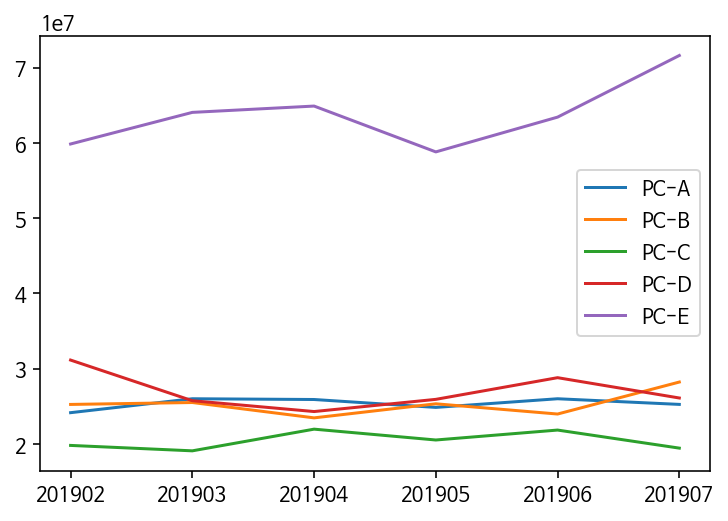

In [121]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(list(graph_data.index), graph_data["PC-A"], label='PC-A')
plt.plot(list(graph_data.index), graph_data["PC-B"], label='PC-B')
plt.plot(list(graph_data.index), graph_data["PC-C"], label='PC-C')
plt.plot(list(graph_data.index), graph_data["PC-D"], label='PC-D')
plt.plot(list(graph_data.index), graph_data["PC-E"], label='PC-E')
plt.legend()

###데이터 스케일링 (scaling)  
• 데이터 전처리 과정의 하나   

• 데이터 스케일링을 해주는 이유 - 데이터의 값이 너무 크거나 혹은 작은 경우에 모델 알고리즘 학습과정에서 0으
로 수렴하거나 무한으로 발산 해버릴 수 있기 때문   

• 데이터 전처리 과정에서 굉장히 중요한 과정

등간척도  
• 상호간의 서열뿐 아니라 인접한 두 변수 값의 차이가 일정한 변수  
• 예) 온도, IQ, 시각, 만족도 등

비율척도  
• 상호간 서열, 크기 차이, 크기 비교, 특성들 간의 계산까지 가능한 척도  
• 몸무게, 키, 나이, 길이, 임금 등

Feature Scaling(정규화)  
• 각 피처가 가지는 값들의 숫자 범위(Scale)가 다를 경우 이 값의 범위를 일정한 범위로 맞추는 작업   
• 트리계열을 제외한 대부분의 머신러닝 알고리즘들이 피처의 스케일에 영향을 받는다 (선형모델, SVM, 신경망 모
델 등)  
• Scaling(정규화)은 train set으로 fitting 한다  
• test set이나 예측할 새로운 데이터는 train set으로 fitting한 것으로 변환한다.  

### 수치형 데이터 특성 스케일 변환
• 수치형 특성이 두 값의 범위 안에 놓이도록 변환

• 머신러닝 알고리즘은 모든 특성이 동일한 스케일을 가지고 있다고 가정 일반적으로 (0 ~ 1) 이나 , (-1~1) 사이

• 사이킷런의 MinMaxScaler - 특성의 최솟값과 최댓값을 사용하여 일정 범위 안으로 값을 조정

• MinMaxScaler.fit() - 특성의 최솟값과 최댓값을 계산

• MinMaxScaler.transform() - 특성의 스케일을 변환

• MinMaxScaler.fit_transform() - 학습과 변환을 한번에 처리

In [103]:
import numpy as np
from sklearn import preprocessing

#0과1 사이의 범위로 정규화 처리
feature = np.array([[-500.5], [-100.1], [0], [100.1], [900.9]])
minmax_scale = preprocessing.MinMaxScaler(feature_range=(0, 1))

scaled_feature = minmax_scale.fit_transform(feature)
scaled_feature

array([[0.        ],
       [0.28571429],
       [0.35714286],
       [0.42857143],
       [1.        ]])

In [128]:
from sklearn.datasets import load_iris
from sklearn import preprocessing

iris = load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_df.describe()

mm_scaler = preprocessing.MinMaxScaler()
iris_scaled2 = mm_scaler.fit_transform(iris_df)
iris_scaled_df2 = pd.DataFrame(iris_scaled2, columns= iris.feature_names)
iris_scaled_df2.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,0.428704,0.440556,0.467458,0.458056
std,0.230018,0.181611,0.299203,0.317599
min,0.000000,0.000000,0.000000,0.000000
25%,0.222222,0.333333,0.101695,0.083333
50%,0.416667,0.416667,0.567797,0.500000
75%,0.583333,0.541667,0.694915,0.708333
max,1.000000,1.000000,1.000000,1.000000


• 표준화 변환 - 특성을 평균이 0이고 표준편차가 1이 되도록 변환

• 0을 기준으로 모든 데이터들이 모여 있게 된다.

• 특성을 표준 정규분포로 근사하는 스케일링 방식

• 변환된 특성은 원본 값이 특성 평균에서 몇 표준편차만큼 떨어져 있는지로 표현(통계학에서는 z-점수)

• 주성분 분석은 표준화가 적합하지만 신경망에는 최소-최대 스케일링을 권장

• SVM이나 선형회귀, 로지스틱 알고리즘(선형모델)은 데이터셋이 표준정규분포를 따를 때 성능이 좋은 모델이기
때문에 표준화를 하면 대부분의 경우 성능이 향상된다.

• sklearn.preprocessing.StandardScaler

In [131]:
import numpy as np
from sklearn import preprocessing

x= np.array([[-1000.1], [-200.2], [500.5], [600.6], [9000.9]])
scaler = preprocessing.StandardScaler()
standardized = scaler.fit_transform(x)
standardized

print("평균:", round(standardized.mean()))
print("표준편차:", standardized.std())

평균: 0
표준편차: 1.0


In [134]:
scaler = preprocessing.StandardScaler()
scaler.fit(iris_df)
iris_scaled = scaler.fit_transform(iris_df)
iris_scaled_df = pd.DataFrame(iris_scaled, columns= iris.feature_names)
print(iris_scaled_df)
iris_scaled_df.describe()

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0            -0.900681          1.019004          -1.340227         -1.315444
1            -1.143017         -0.131979          -1.340227         -1.315444
2            -1.385353          0.328414          -1.397064         -1.315444
3            -1.506521          0.098217          -1.283389         -1.315444
4            -1.021849          1.249201          -1.340227         -1.315444
..                 ...               ...                ...               ...
145           1.038005         -0.131979           0.819596          1.448832
146           0.553333         -1.282963           0.705921          0.922303
147           0.795669         -0.131979           0.819596          1.053935
148           0.432165          0.788808           0.933271          1.448832
149           0.068662         -0.131979           0.762758          0.790671

[150 rows x 4 columns]


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02
mean,-1.690315e-15,-1.842970e-15,-1.698641e-15,-1.409243e-15
std,1.003350e+00,1.003350e+00,1.003350e+00,1.003350e+00
min,-1.870024e+00,-2.433947e+00,-1.567576e+00,-1.447076e+00
25%,-9.006812e-01,-5.923730e-01,-1.226552e+00,-1.183812e+00
50%,-5.250608e-02,-1.319795e-01,3.364776e-01,1.325097e-01
75%,6.745011e-01,5.586108e-01,7.627583e-01,7.906707e-01
max,2.492019e+00,3.090775e+00,1.785832e+00,1.712096e+00


In [145]:
#특성 스케일 변환 - [실습] 위스콘신 유방함 데이터셋 (MinMaxScaler)

from sklearn.preprocessing import StandardScaler, MinMaxScaler
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
#print(cancer.feature_names)
#print(cancer.target_names)

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state = 0)
pd.DataFrame(X_train)

from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)
pred_train = svm.predict(X_train)
pred_test = svm.predict(X_test)
print('train 정확도:', accuracy_score(y_train, pred_train))
print('test 정확도:', accuracy_score(y_test, pred_test))

#데이터표준화 - 수치형 특성이 두 값의 범위 안에 놓이도록 변환
mm_scaler = MinMaxScaler()

#학습데이터로부터 변환을 위해 스케일링을 위한 학습 후, 변환 수행
X_train_scaled = mm_scaler.fit_transform(X_train)
#테스트 데이터는 학습으로부터 생성된 모델로 변환만 수행
X_test_scaled = mm_scaler.transform(X_test)

svm = SVC()
svm.fit(X_train_scaled, y_train)

pred_train2 = svm.predict(X_train_scaled)
pred_test2 = svm.predict(X_test_scaled)
print('scaling된 train 정확도:', accuracy_score(y_train, pred_train2))
print('scaling된 test 정확도:', accuracy_score(y_test, pred_test2))

train 정확도: 0.9225352112676056
test 정확도: 0.916083916083916
scaling된 train 정확도: 0.9906103286384976
scaling된 test 정확도: 0.9440559440559441


In [147]:
svm = SVC()
svm.fit(X_train, y_train)
pred_train = svm.predict(X_train)
pred_test = svm.predict(X_test)
print('train 정확도:', accuracy_score(y_train, pred_train))
print('test 정확도:', accuracy_score(y_test, pred_test))

#데이터표준화 - 특성을 평균이 0이고 표준편차가 1이 되도록 변환
mm_scaler = StandardScaler()

scaled_cancer = mm_scaler.fit_transform(cancer_data)
X_train, X_test, y_train, y_test = train_test_split(scaled_cancer, cancer.target, stratify=cancer.target, random_state = 0)
svm = SVC()
svm.fit(X_train, y_train)
pred_train3 = svm.predict(X_train)
pred_test3 = svm.predict(X_test)
print('(standard scaling한) train 정확도 : ', accuracy_score(y_train, pred_train3))
print('(standard scaling한) test 정확도 : ', accuracy_score(y_test, pred_test3))

train 정확도: 0.9225352112676056
test 정확도: 0.916083916083916
(standard scaling한) train 정확도 :  0.9929577464788732
(standard scaling한) test 정확도 :  0.958041958041958
